# Projet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
import re

In [2]:
# Importation de la librairie iads
import iads as iads


# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

from iads import Unsupervised as un

In [3]:
help(iads)

Help on package iads:

NAME
    iads

DESCRIPTION
    Package: iads
    File: __init__.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

PACKAGE CONTENTS
    Classifiers
    LabeledSet
    Unsupervised
    utils

FILE
    d:\ariana\documentos\faculdade\3i026\projet\iads\__init__.py




## Import des bases de données CSV

In [4]:
path = "data/"

movies_pd = pd.read_csv(path + "movies.csv", index_col = 0)
movies_pd.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
genres = ["Action", "Adventure", "Animation", "Children", "Comedy", \
          "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", \
          "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", \
          "Western", "(no genres listed)"]

for g in genres:
    movies_pd[g.lower()] = movies_pd.apply(lambda r: 2*int(g in r["genres"]) - 1, axis=1)

In [6]:
movies_pd.head()

,title,genres,action,adventure,animation,children,comedy,crime,documentary,drama,...,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,-1,1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Jumanji (1995),Adventure|Children|Fantasy,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Grumpier Old Men (1995),Comedy|Romance,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
4,Waiting to Exhale (1995),Comedy|Drama|Romance,-1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
5,Father of the Bride Part II (1995),Comedy,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
def get_year(r):
    match = re.match("(.*)\s*\((\d+)\)", r["title"])
    if match:
        return match.group(2)
    
def get_title_without_year(r):
    match = re.match("(.*)\s*\((\d+)\)", r["title"])
    if match:
        return match.group(1)
    else:
        return r["title"]

movies_pd["Year"] = movies_pd.apply(get_year, axis = 1)
movies_pd["title"] = movies_pd.apply(get_title_without_year, axis = 1)

In [8]:
movies_pd.head()

,title,genres,action,adventure,animation,children,comedy,crime,documentary,drama,...,horror,musical,mystery,romance,sci-fi,thriller,war,western,(no genres listed),Year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,-1,1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1995
2,Jumanji,Adventure|Children|Fantasy,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1995
3,Grumpier Old Men,Comedy|Romance,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1995
4,Waiting to Exhale,Comedy|Drama|Romance,-1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1995
5,Father of the Bride Part II,Comedy,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1995


In [9]:
ratings_pd = pd.read_csv(path + "ratings.csv")
ratings_pd.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [10]:
movies_pd["Average rating"] = ratings_pd.groupby("movieId")["rating"].mean()
movies_pd["Number of ratings"] = ratings_pd.groupby("movieId")["rating"].count()

movies_pd["Average rating"].fillna(0, inplace = True)
movies_pd["Number of ratings"].fillna(0, inplace = True)

In [11]:
movies_pd.head()

,title,genres,action,adventure,animation,children,comedy,crime,documentary,drama,...,mystery,romance,sci-fi,thriller,war,western,(no genres listed),Year,Average rating,Number of ratings
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,-1,1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1995,3.921240,49695.0
2,Jumanji,Adventure|Children|Fantasy,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1995,3.211977,22243.0
3,Grumpier Old Men,Comedy|Romance,-1,-1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,1995,3.151040,12735.0
4,Waiting to Exhale,Comedy|Drama|Romance,-1,-1,-1,-1,1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,1995,2.861393,2756.0
5,Father of the Bride Part II,Comedy,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1995,3.064592,12161.0


In [12]:
tags_pd = pd.read_csv(path + "tags.csv", encoding="utf-8")

In [13]:
print(tags_pd.shape)
tags_pd.head()

(465564, 4)


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [14]:
links_pd = pd.read_csv(path + "links.csv", encoding="utf-8", keep_default_na = False)
links_pd = links_pd.loc[links_pd["tmdbId"]!=""]
links_pd["tmdbId"] = pd.to_numeric(links_pd["tmdbId"])

In [15]:
links_pd.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


## Import des bases de données PKL

In [16]:
with open(path + "act_v2.pkl", "rb") as file_act :
    acteurs_pkl = pkl.load(file_act)
#acteurs_pkl contient une list * list * dict
#acteurs_pkl[i][j] est un dictionnaire avec des informations sur le j-ème acteur du i-ème film de la base act_v2.pkl

In [17]:
print(type(acteurs_pkl))
print(type(acteurs_pkl[0]))
print(type(acteurs_pkl[0][0]))
print(len(acteurs_pkl[0]))
print(acteurs_pkl[0][0])

<class 'list'>
<class 'list'>
<class 'dict'>
39
{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/xxPMucou2wRDxLrud8i2D4dsywh.jpg'}


In [18]:
with open(path + "film_v2.pkl", "rb") as file_film :
    films_pkl = pkl.load(file_film)
#films_pkl contient une list * dict
#films_pkl[i] est un dictionnaire avec des informations sur le i-ème film de la base act_v2.pkl

In [19]:
print(type(films_pkl))
print(type(films_pkl[0]))
print(len(films_pkl))
print(films_pkl[0])

<class 'list'>
<class 'dict'>
26908
{'adult': False, 'backdrop_path': '/dji4Fm0gCDVb9DQQMRvAI8YNnTz.jpg', 'genre_ids': [16, 35, 10751], 'id': 862, 'original_language': 'en', 'original_title': 'Toy Story', 'overview': "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.", 'poster_path': '/rhIRbceoE9lR4veEXuwCC2wARtG.jpg', 'release_date': '1995-10-30', 'title': 'Toy Story', 'video': False, 'vote_average': 7.9, 'vote_count': 9550, 'popularity': 22.773}


In [20]:
with open(path + "crew_v2.pkl", "rb") as file_crew :
    crew_pkl = pkl.load(file_crew)

In [21]:
print(type(crew_pkl))
print(type(crew_pkl[0]))
print(type(crew_pkl[0][0]))
print(len(crew_pkl))
print(crew_pkl[0][0])

<class 'list'>
<class 'list'>
<class 'dict'>
26908
{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}


## Import des bases CSV obtenus à partir des PKL

In [22]:
actors_pd = pd.read_csv(path + "generated/actors.csv", sep=";", index_col="idActor")
actorsFilms_pd = pd.read_csv(path + "generated/actorsFilms.csv", sep=";")

In [23]:
actors_pd.head()

,name,gender
idActor,,
31,Tom Hanks,2
12898,Tim Allen,2
7167,Don Rickles,2
12899,Jim Varney,2
12900,Wallace Shawn,2


In [24]:
actorsFilms_pd.head()

,idActor,idFilmPkl,order,character
0,31,0,0,Woody (voice)
1,12898,0,1,Buzz Lightyear (voice)
2,7167,0,2,Mr. Potato Head (voice)
3,12899,0,3,Slinky Dog (voice)
4,12900,0,4,Rex (voice)


In [25]:
actors_pd["nbRoles"] = actorsFilms_pd.groupby('idActor').count()["idFilmPkl"]

In [26]:
actors_pd.sort_values("nbRoles", axis=0, ascending=False).head(10)

,name,gender,nbRoles
idActor,,,
121323,Bess Flowers,1,215
15831,Frank Welker,2,125
4165,John Wayne,2,114
2231,Samuel L. Jackson,2,104
113,Christopher Lee,2,104
884,Steve Buscemi,2,93
380,Robert De Niro,2,92
3895,Michael Caine,2,90
55636,Donald Sutherland,2,87


In [27]:
films_pd = pd.read_csv(path + "generated/films.csv", sep=";", index_col="idFilmPkl")
films_pd["idFilmPkl"] = films_pd.index

In [28]:
films_pd.head()

,tmdbId,adult,original_language,original_title,release_date,title,vote_average,vote_count,popularity,idFilmPkl
idFilmPkl,,,,,,,,,,
0,862,0,en,Toy Story,1995-10-30,Toy Story,7.9,9550,22.773,0
1,8844,0,en,Jumanji,1995-12-15,Jumanji,7.1,5594,2.947,1
2,15602,0,en,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,140,6.076,2
3,31357,0,en,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,55,2.917,3
4,11862,0,en,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,6.1,288,6.817,4


In [29]:
films_pd.groupby("original_language").count().head()

,tmdbId,adult,original_title,release_date,title,vote_average,vote_count,popularity,idFilmPkl
original_language,,,,,,,,,
aa,1,1,1,1,1,1,1,1,1
ab,4,4,4,4,4,4,4,4,4
af,1,1,1,1,1,1,1,1,1
am,1,1,1,1,1,1,1,1,1
ar,21,21,21,21,21,21,21,21,21


In [30]:
crew_pd = pd.read_csv(path + "generated/crew.csv", sep=";", index_col="idCrew")
crewFilms_pd = pd.read_csv(path + "generated/crewFilms.csv", sep=";")

In [31]:
crew_pd.head()

,name,gender
idCrew,,
7879,John Lasseter,2
12891,Joss Whedon,2
7,Andrew Stanton,2
12892,Joel Cohen,2
12893,Alec Sokolow,0


In [32]:
crewFilms_pd.head()

,idCrew,idFilmPkl,department,job
0,7879,0,Directing,Director
1,12891,0,Writing,Screenplay
2,7,0,Writing,Screenplay
3,12892,0,Writing,Screenplay
4,12893,0,Writing,Screenplay


In [33]:
crew_pd["nbFilms"] = crewFilms_pd.groupby('idCrew').count()["idFilmPkl"]

In [34]:
crew_pd.sort_values("nbFilms", axis=0, ascending=False).head(10)

,name,gender,nbFilms
idCrew,,,
9062,Cedric Gibbons,2,282
59839,Harvey Weinstein,2,234
1307,Bob Weinstein,2,226
4350,Edith Head,1,174
2057972,Dan Perri,0,172
2952,Avy Kaufman,1,151
9063,Edwin B. Willis,2,142
1760,Jerry Goldsmith,2,140
5328,Kerry Barden,2,134


In [35]:
new_links_pd = links_pd.merge(films_pd[["idFilmPkl", "tmdbId"]], how="inner", on="tmdbId")
new_links_pd.head()

,movieId,imdbId,tmdbId,idFilmPkl
0,1,114709,862,0
1,2,113497,8844,1
2,3,113228,15602,2
3,4,114885,31357,3
4,5,113041,11862,4


In [36]:
filmes_pd = new_links_pd.merge(films_pd, how="inner", on="tmdbId")
filmes_pd = filmes_pd.merge(movies_pd, how="inner", on="movieId")
filmes_pd.drop(["imdbId", "idFilmPkl_y", "genres"], axis=1, inplace=True)
filmes_pd.rename({"idFilmPkl_x": "idFilmPkl",\
                  "original_language": "originalLanguage",\
                  "original_title": "originalTitle",\
                  "release_date": "releaseDate",\
                  "title_x": "titleTmdb",\
                  "vote_average": "ratingTmdb",\
                  "vote_count": "nbRatingTmdb",\
                  "title_y": "titleMovieLens",\
                  "Year": "year",\
                  "Average rating": "ratingMovieLens",\
                  "Number of ratings": "nbRatingMovieLens"}, axis=1, inplace=True)
print(filmes_pd.columns)
filmes_pd.head()

Index(['movieId', 'tmdbId', 'idFilmPkl', 'adult', 'originalLanguage',
       'originalTitle', 'releaseDate', 'titleTmdb', 'ratingTmdb',
       'nbRatingTmdb', 'popularity', 'titleMovieLens', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western', '(no genres listed)', 'year',
       'ratingMovieLens', 'nbRatingMovieLens'],
      dtype='object')


,movieId,tmdbId,idFilmPkl,adult,originalLanguage,originalTitle,releaseDate,titleTmdb,ratingTmdb,nbRatingTmdb,...,mystery,romance,sci-fi,thriller,war,western,(no genres listed),year,ratingMovieLens,nbRatingMovieLens
0,1,862,0,0,en,Toy Story,1995-10-30,Toy Story,7.9,9550,...,-1,-1,-1,-1,-1,-1,-1,1995,3.921240,49695.0
1,2,8844,1,0,en,Jumanji,1995-12-15,Jumanji,7.1,5594,...,-1,-1,-1,-1,-1,-1,-1,1995,3.211977,22243.0
2,3,15602,2,0,en,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,140,...,-1,1,-1,-1,-1,-1,-1,1995,3.151040,12735.0
3,4,31357,3,0,en,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,55,...,-1,1,-1,-1,-1,-1,-1,1995,2.861393,2756.0
4,5,11862,4,0,en,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,6.1,288,...,-1,-1,-1,-1,-1,-1,-1,1995,3.064592,12161.0


In [37]:
nbActors = actorsFilms_pd[["idFilmPkl", "order"]].groupby("idFilmPkl").count().rename({"order": "nbActors"}, axis=1)
filmes_pd = filmes_pd.merge(nbActors, how="inner", on="idFilmPkl")
nbCrew = crewFilms_pd[["idFilmPkl", "job"]].groupby("idFilmPkl").count().rename({"job": "nbCrew"}, axis=1)
filmes_pd = filmes_pd.merge(nbCrew, how="inner", on="idFilmPkl")

In [38]:
filmes_pd

,movieId,tmdbId,idFilmPkl,adult,originalLanguage,originalTitle,releaseDate,titleTmdb,ratingTmdb,nbRatingTmdb,...,sci-fi,thriller,war,western,(no genres listed),year,ratingMovieLens,nbRatingMovieLens,nbActors,nbCrew
0,1,862,0,0,en,Toy Story,1995-10-30,Toy Story,7.9,9550,...,-1,-1,-1,-1,-1,1995,3.921240,49695.0,39,195
1,2,8844,1,0,en,Jumanji,1995-12-15,Jumanji,7.1,5594,...,-1,-1,-1,-1,-1,1995,3.211977,22243.0,32,94
2,3,15602,2,0,en,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,140,...,-1,-1,-1,-1,-1,1995,3.151040,12735.0,7,50
3,4,31357,3,0,en,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,55,...,-1,-1,-1,-1,-1,1995,2.861393,2756.0,14,14
4,5,11862,4,0,en,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,6.1,288,...,-1,-1,-1,-1,-1,1995,3.064592,12161.0,12,7
5,6,949,5,0,en,Heat,1995-12-15,Heat,7.8,3002,...,-1,1,-1,-1,-1,1995,3.834930,23899.0,65,73
6,7,11860,6,0,en,Sabrina,1995-12-15,Sabrina,6.1,260,...,-1,-1,-1,-1,-1,1995,3.366484,12961.0,57,53
7,8,45325,7,0,en,Tom and Huck,1995-12-22,Tom and Huck,5.3,73,...,-1,-1,-1,-1,-1,1995,3.142049,1415.0,7,4
8,9,9091,8,0,en,Sudden Death,1995-10-27,Sudden Death,5.7,279,...,-1,-1,-1,-1,-1,1995,3.004924,3960.0,6,90
9,10,710,9,0,en,GoldenEye,1995-11-16,GoldenEye,6.8,1853,...,-1,1,-1,-1,-1,1995,3.430029,29005.0,21,46


In [39]:
actorsFilms_pd.head()

,idActor,idFilmPkl,order,character
0,31,0,0,Woody (voice)
1,12898,0,1,Buzz Lightyear (voice)
2,7167,0,2,Mr. Potato Head (voice)
3,12899,0,3,Slinky Dog (voice)
4,12900,0,4,Rex (voice)


In [40]:
filmes_pd["nbRatingMovieLens"].dtype

dtype('float64')

In [41]:
actors_pd.sort_values("nbRoles", ascending=False, inplace = True)
nbActors = actors_pd.shape[0]
rate = 0.05
nbFamousActors = int(rate*nbActors)
famous_actors_pd = actors_pd.iloc[:nbFamousActors]
idFamousActors = set(famous_actors_pd.index)

In [42]:
nbFamousActorsInFilm = np.zeros(len(acteurs_pkl), dtype=int)

for i in range(nbFamousActorsInFilm.size):
    film = acteurs_pkl[i]
    for actor in film:
        if actor["id"] in idFamousActors:
            nbFamousActorsInFilm[i] += 1
            
famousActorsInFilm_pd = pd.DataFrame(data={"idFilmPkl": np.arange(nbFamousActorsInFilm.size), "nbFamousActors": nbFamousActorsInFilm})

In [43]:
filmes_pd = filmes_pd.merge(famousActorsInFilm_pd, how="inner", on="idFilmPkl")

In [44]:
filmes_pd.head()

,movieId,tmdbId,idFilmPkl,adult,originalLanguage,originalTitle,releaseDate,titleTmdb,ratingTmdb,nbRatingTmdb,...,thriller,war,western,(no genres listed),year,ratingMovieLens,nbRatingMovieLens,nbActors,nbCrew,nbFamousActors
0,1,862,0,0,en,Toy Story,1995-10-30,Toy Story,7.9,9550,...,-1,-1,-1,-1,1995,3.921240,49695.0,39,195,21
1,2,8844,1,0,en,Jumanji,1995-12-15,Jumanji,7.1,5594,...,-1,-1,-1,-1,1995,3.211977,22243.0,32,94,10
2,3,15602,2,0,en,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,140,...,-1,-1,-1,-1,1995,3.151040,12735.0,7,50,7
3,4,31357,3,0,en,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,55,...,-1,-1,-1,-1,1995,2.861393,2756.0,14,14,11
4,5,11862,4,0,en,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,6.1,288,...,-1,-1,-1,-1,1995,3.064592,12161.0,12,7,12


In [45]:
crew_pd.sort_values("nbFilms", ascending=False, inplace = True)
nbCrew = crew_pd.shape[0]
rate = 0.05
nbFamousCrew = int(rate*nbCrew)
famous_crew_pd = crew_pd.iloc[:nbFamousCrew]
idFamousCrew = set(famous_crew_pd.index)

In [46]:
nbFamousCrewInFilm = np.zeros(len(crew_pkl), dtype=int)

for i in range(nbFamousCrewInFilm.size):
    film = crew_pkl[i]
    for actor in film:
        if actor["id"] in idFamousCrew:
            nbFamousCrewInFilm[i] += 1
            
famousCrewInFilm_pd = pd.DataFrame(data={"idFilmPkl": np.arange(nbFamousCrewInFilm.size), "nbFamousCrew": nbFamousCrewInFilm})

In [47]:
filmes_pd = filmes_pd.merge(famousCrewInFilm_pd, how="inner", on="idFilmPkl")

In [48]:
filmes_pd["year"] = pd.to_numeric(filmes_pd["year"])

In [49]:
df_temp = pd.merge(left = actorsFilms_pd.drop("character", axis = 1), right = filmes_pd[(filmes_pd.year >= 1980) & (filmes_pd.year <= 2000)][["idFilmPkl", "ratingMovieLens"]], on = "idFilmPkl", how = "inner")

In [50]:
df_temp.head()

,idActor,idFilmPkl,order,ratingMovieLens
0,31,0,0,3.92124
1,12898,0,1,3.92124
2,7167,0,2,3.92124
3,12899,0,3,3.92124
4,12900,0,4,3.92124


In [51]:
df_temp.groupby("idActor")["ratingMovieLens"].agg(["mean", "max", "std", "count"])

,mean,max,std,count
idActor,,,,
1,3.537370,4.100000,0.570758,5
2,3.024307,4.188202,0.685681,16
3,3.489995,4.219009,0.506204,23
4,3.225579,4.188202,0.537226,19
5,2.683505,3.593370,0.783208,5
6,3.693452,4.188202,0.501380,4
7,3.791232,3.921240,0.161386,3
8,3.726228,3.841853,0.163518,2
10,3.824219,3.824219,NaN,1


In [52]:
df_temp2 = df_temp.groupby("idActor")["ratingMovieLens"].agg(["mean", "max", "std", "count"])

In [53]:
actorsFilms_pd = pd.merge(df_temp2.reset_index(), actorsFilms_pd, on = "idActor")

In [54]:
actorsFilms_pd.head()

,idActor,mean,max,std,count,idFilmPkl,order,character
0,1,3.53737,4.1,0.570758,5,416,21,Disappointed Man
1,1,3.53737,4.1,0.570758,5,2017,66,Missionary (uncredited)
2,1,3.53737,4.1,0.570758,5,3378,27,Man Kissing on Bridge (uncredited)
3,1,3.53737,4.1,0.570758,5,8968,3,Himself
4,1,3.53737,4.1,0.570758,5,10053,24,Baron Papanoida


In [55]:
actorsFilms_pd["std"].fillna(0, inplace = True)

In [56]:
actorsFilms_pd.head(20)

,idActor,mean,max,std,count,idFilmPkl,order,character
0,1,3.537370,4.100000,0.570758,5,416,21,Disappointed Man
1,1,3.537370,4.100000,0.570758,5,2017,66,Missionary (uncredited)
2,1,3.537370,4.100000,0.570758,5,3378,27,Man Kissing on Bridge (uncredited)
3,1,3.537370,4.100000,0.570758,5,8968,3,Himself
4,1,3.537370,4.100000,0.570758,5,10053,24,Baron Papanoida
5,1,3.537370,4.100000,0.570758,5,10077,11,Himself
6,1,3.537370,4.100000,0.570758,5,10674,7,Himself
7,1,3.537370,4.100000,0.570758,5,10837,3,Himself
8,1,3.537370,4.100000,0.570758,5,15389,7,Himself
9,1,3.537370,4.100000,0.570758,5,16324,9,Himself


In [57]:
df_temp3 = actorsFilms_pd[actorsFilms_pd.order <= 4].groupby("idFilmPkl").agg({"mean": ["mean", "max"], "max": ["mean", "max"], "std": ["mean"]})

In [58]:
df_temp3.head()

mean                 max                 std
               mean       max      mean       max      mean
idFilmPkl                                                  
0          3.045021  3.306738  4.016726  4.176732  0.633734
1          3.059675  3.213537  3.737697  4.032517  0.526979
2          3.003564  3.157466  3.725279  4.133706  0.620792
3          2.987962  3.150614  3.646566  4.500000  0.389863
4          3.083039  3.302327  3.633762  3.882106  0.376967

In [59]:
df_temp3.columns = ["actor_rating_mean_mean", "actor_rating_mean_max", "actor_rating_max_mean", "actor_rating_max_max", "actor_rating_std_mean"]

In [60]:
df_temp3.head()

,actor_rating_mean_mean,actor_rating_mean_max,actor_rating_max_mean,actor_rating_max_max,actor_rating_std_mean
idFilmPkl,,,,,
0,3.045021,3.306738,4.016726,4.176732,0.633734
1,3.059675,3.213537,3.737697,4.032517,0.526979
2,3.003564,3.157466,3.725279,4.133706,0.620792
3,2.987962,3.150614,3.646566,4.500000,0.389863
4,3.083039,3.302327,3.633762,3.882106,0.376967


In [61]:
filmes_pd = pd.merge(filmes_pd, df_temp3.reset_index(), on = "idFilmPkl")

In [62]:
filmes_pd

,movieId,tmdbId,idFilmPkl,adult,originalLanguage,originalTitle,releaseDate,titleTmdb,ratingTmdb,nbRatingTmdb,...,nbRatingMovieLens,nbActors,nbCrew,nbFamousActors,nbFamousCrew,actor_rating_mean_mean,actor_rating_mean_max,actor_rating_max_mean,actor_rating_max_max,actor_rating_std_mean
0,1,862,0,0,en,Toy Story,1995-10-30,Toy Story,7.9,9550,...,49695.0,39,195,21,40,3.045021,3.306738,4.016726,4.176732,0.633734
1,2,8844,1,0,en,Jumanji,1995-12-15,Jumanji,7.1,5594,...,22243.0,32,94,10,26,3.059675,3.213537,3.737697,4.032517,0.526979
2,3,15602,2,0,en,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,140,...,12735.0,7,50,7,29,3.003564,3.157466,3.725279,4.133706,0.620792
3,4,31357,3,0,en,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,55,...,2756.0,14,14,11,8,2.987962,3.150614,3.646566,4.500000,0.389863
4,5,11862,4,0,en,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,6.1,288,...,12161.0,12,7,12,6,3.083039,3.302327,3.633762,3.882106,0.376967
5,6,949,5,0,en,Heat,1995-12-15,Heat,7.8,3002,...,23899.0,65,73,30,43,3.233218,3.409669,3.972185,4.183633,0.531115
6,7,11860,6,0,en,Sabrina,1995-12-15,Sabrina,6.1,260,...,12961.0,57,53,18,33,3.171590,3.489995,3.716597,4.219009,0.392244
7,8,45325,7,0,en,Tom and Huck,1995-12-22,Tom and Huck,5.3,73,...,1415.0,7,4,5,4,3.156284,3.472835,3.715084,3.985390,0.407741
8,9,9091,8,0,en,Sudden Death,1995-10-27,Sudden Death,5.7,279,...,3960.0,6,90,4,27,2.911132,3.042710,3.667049,4.033180,0.509234
9,10,710,9,0,en,GoldenEye,1995-11-16,GoldenEye,6.8,1853,...,29005.0,21,46,16,20,3.076696,3.224749,3.754004,4.000000,0.552802


In [63]:
actorsFilms_pd.head()

,idActor,mean,max,std,count,idFilmPkl,order,character
0,1,3.53737,4.1,0.570758,5,416,21,Disappointed Man
1,1,3.53737,4.1,0.570758,5,2017,66,Missionary (uncredited)
2,1,3.53737,4.1,0.570758,5,3378,27,Man Kissing on Bridge (uncredited)
3,1,3.53737,4.1,0.570758,5,8968,3,Himself
4,1,3.53737,4.1,0.570758,5,10053,24,Baron Papanoida


In [64]:
actors_pd.head()

,name,gender,nbRoles
idActor,,,
121323,Bess Flowers,1,215
15831,Frank Welker,2,125
4165,John Wayne,2,114
2231,Samuel L. Jackson,2,104
113,Christopher Lee,2,104


In [65]:
filmes_pd['releaseWeek'] = filmes_pd.releaseDate.apply(lambda x: pd.to_datetime(x).week)
filmes_pd['releaseMonth'] = filmes_pd.releaseDate.apply(lambda x: pd.to_datetime(x).month)

In [66]:
filmes_pd.columns

Index(['movieId', 'tmdbId', 'idFilmPkl', 'adult', 'originalLanguage',
       'originalTitle', 'releaseDate', 'titleTmdb', 'ratingTmdb',
       'nbRatingTmdb', 'popularity', 'titleMovieLens', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western', '(no genres listed)', 'year',
       'ratingMovieLens', 'nbRatingMovieLens', 'nbActors', 'nbCrew',
       'nbFamousActors', 'nbFamousCrew', 'actor_rating_mean_mean',
       'actor_rating_mean_max', 'actor_rating_max_mean',
       'actor_rating_max_max', 'actor_rating_std_mean', 'releaseWeek',
       'releaseMonth'],
      dtype='object')

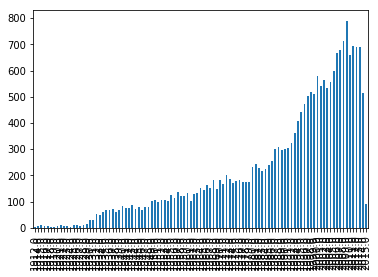

In [67]:
filmes_pd.year.value_counts().sort_index().plot("bar")

In [68]:
filmes_pd[filmes_pd.year == 2001][["ratingMovieLens"] + [col for col in filmes_pd.columns if col.startswith('actor_rating')]].corr()

,ratingMovieLens,actor_rating_mean_mean,actor_rating_mean_max,actor_rating_max_mean,actor_rating_max_max,actor_rating_std_mean
ratingMovieLens,1.000000,0.264846,0.214893,0.147218,0.009451,-0.064628
actor_rating_mean_mean,0.264846,1.000000,0.747381,0.641787,0.272645,-0.408726
actor_rating_mean_max,0.214893,0.747381,1.000000,0.424074,0.394153,-0.368304
actor_rating_max_mean,0.147218,0.641787,0.424074,1.000000,0.696527,0.320543
actor_rating_max_max,0.009451,0.272645,0.394153,0.696527,1.000000,0.343484
actor_rating_std_mean,-0.064628,-0.408726,-0.368304,0.320543,0.343484,1.000000


In [69]:
filmes_pd.columns 

Index(['movieId', 'tmdbId', 'idFilmPkl', 'adult', 'originalLanguage',
       'originalTitle', 'releaseDate', 'titleTmdb', 'ratingTmdb',
       'nbRatingTmdb', 'popularity', 'titleMovieLens', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western', '(no genres listed)', 'year',
       'ratingMovieLens', 'nbRatingMovieLens', 'nbActors', 'nbCrew',
       'nbFamousActors', 'nbFamousCrew', 'actor_rating_mean_mean',
       'actor_rating_mean_max', 'actor_rating_max_mean',
       'actor_rating_max_max', 'actor_rating_std_mean', 'releaseWeek',
       'releaseMonth'],
      dtype='object')

In [70]:
filmes_pd["is_english"] = (filmes_pd["originalLanguage"] == "en") * 1

In [71]:
filmes_pd.tail()

,movieId,tmdbId,idFilmPkl,adult,originalLanguage,originalTitle,releaseDate,titleTmdb,ratingTmdb,nbRatingTmdb,...,nbFamousActors,nbFamousCrew,actor_rating_mean_mean,actor_rating_mean_max,actor_rating_max_mean,actor_rating_max_max,actor_rating_std_mean,releaseWeek,releaseMonth,is_english
22091,131250,9565,26901,0,de,Schule,2000-12-07,No More School,5.6,27,...,2,1,4.000000,4.000000,4.000000,4.000000,0.000000,49.0,12.0,0
22092,131254,4436,26903,0,de,Kein Bund für's Leben,2007-08-30,Military Academy,5.7,14,...,2,0,3.795455,4.000000,3.795455,4.000000,0.000000,35.0,8.0,0
22093,131256,9274,26904,0,de,"Feuer, Eis & Dosenbier",2002-02-21,"Fire, Ice & Canned Beer",4.4,11,...,3,0,3.611111,4.000000,3.750000,4.000000,0.240563,8.0,2.0,0
22094,131260,32099,26906,0,fi,Rentun Ruusu,2001-01-01,The Rose of the Rascal,6.7,6,...,2,2,3.271378,3.598529,3.680723,3.892857,0.515814,1.0,1.0,0
22095,131262,286971,26907,0,en,Innocence,2014-09-05,Innocence,4.3,19,...,3,0,3.213890,3.462867,3.346889,3.728865,0.144311,36.0,9.0,1


In [72]:
filmes_pd_redux = filmes_pd[['action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western', 'nbActors', 'nbCrew', 'releaseWeek',
       'releaseMonth', 'actor_rating_mean_mean', 'actor_rating_mean_max',
       'actor_rating_max_mean', 'is_english', 'year', 'ratingMovieLens']]

In [73]:
filmes_pd_redux.dropna(inplace = True)

C:\Users\arian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
filmes_pd_redux.isnull().sum()

action                    0
adventure                 0
animation                 0
children                  0
comedy                    0
crime                     0
documentary               0
drama                     0
fantasy                   0
film-noir                 0
horror                    0
musical                   0
mystery                   0
romance                   0
sci-fi                    0
thriller                  0
war                       0
western                   0
nbActors                  0
nbCrew                    0
releaseWeek               0
releaseMonth              0
actor_rating_mean_mean    0
actor_rating_mean_max     0
actor_rating_max_mean     0
is_english                0
year                      0
ratingMovieLens           0
dtype: int64

In [75]:
filmes_pd_redux

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,...,nbActors,nbCrew,releaseWeek,releaseMonth,actor_rating_mean_mean,actor_rating_mean_max,actor_rating_max_mean,is_english,year,ratingMovieLens
0,-1,1,1,1,1,-1,-1,-1,1,-1,...,39,195,44.0,10.0,3.045021,3.306738,4.016726,1,1995.0,3.921240
1,-1,1,-1,1,-1,-1,-1,-1,1,-1,...,32,94,50.0,12.0,3.059675,3.213537,3.737697,1,1995.0,3.211977
2,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,...,7,50,51.0,12.0,3.003564,3.157466,3.725279,1,1995.0,3.151040
3,-1,-1,-1,-1,1,-1,-1,1,-1,-1,...,14,14,51.0,12.0,2.987962,3.150614,3.646566,1,1995.0,2.861393
4,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,...,12,7,6.0,2.0,3.083039,3.302327,3.633762,1,1995.0,3.064592
5,1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,65,73,50.0,12.0,3.233218,3.409669,3.972185,1,1995.0,3.834930
6,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,...,57,53,50.0,12.0,3.171590,3.489995,3.716597,1,1995.0,3.366484
7,-1,1,-1,1,-1,-1,-1,-1,-1,-1,...,7,4,51.0,12.0,3.156284,3.472835,3.715084,1,1995.0,3.142049
8,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,6,90,43.0,10.0,2.911132,3.042710,3.667049,1,1995.0,3.004924
9,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,21,46,46.0,11.0,3.076696,3.224749,3.754004,1,1995.0,3.430029


In [76]:
filmes_pd_redux_1980_2000 = filmes_pd_redux[(filmes_pd_redux.year >= 1980) & (filmes_pd_redux.year <= 2000)]

In [77]:
filmes_pd_redux_1980_2000.shape

(7268, 28)

In [78]:
filmes_pd_redux_2001 = filmes_pd_redux[filmes_pd_redux.year == 2001]

In [79]:
filmes_pd_redux_2001.shape

(542, 28)

## Non-supervisé

In [80]:
filmes_pd.columns

Index(['movieId', 'tmdbId', 'idFilmPkl', 'adult', 'originalLanguage',
       'originalTitle', 'releaseDate', 'titleTmdb', 'ratingTmdb',
       'nbRatingTmdb', 'popularity', 'titleMovieLens', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western', '(no genres listed)', 'year',
       'ratingMovieLens', 'nbRatingMovieLens', 'nbActors', 'nbCrew',
       'nbFamousActors', 'nbFamousCrew', 'actor_rating_mean_mean',
       'actor_rating_mean_max', 'actor_rating_max_mean',
       'actor_rating_max_max', 'actor_rating_std_mean', 'releaseWeek',
       'releaseMonth', 'is_english'],
      dtype='object')

In [81]:
filmes_pd_redux_redux = filmes_pd[['movieId', 'tmdbId', 'idFilmPkl', 'titleMovieLens', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western', 'ratingMovieLens', 'nbActors', 'nbCrew',
       'actor_rating_mean_mean', 'actor_rating_mean_max', 'actor_rating_max_mean', 'releaseWeek', 'releaseMonth', 'is_english']]
filmes_pd_redux_redux.dropna(inplace = True)

C:\Users\arian\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
from sklearn.cluster import KMeans

cl = KMeans(n_clusters = 10, init = "random", n_init = 1, algorithm = "full")
classification = cl.fit_predict(filmes_pd_redux_redux.drop(['movieId', 'tmdbId', 'idFilmPkl', 'titleMovieLens'], axis=1))

In [83]:
classification

array([3, 9, 9, ..., 1, 1, 6])

Fusion de 76 et 99 pour une distance de 0.0716430660276585
Fusion de 119 et 542 pour une distance de 0.13195272798511629
Fusion de 305 et 543 pour une distance de 0.13091912941908473
Fusion de 21 et 177 pour une distance de 0.13432810695793362
Fusion de 241 et 273 pour une distance de 0.13966407432146355
Fusion de 405 et 545 pour une distance de 0.1411687896794621
Fusion de 7 et 11 pour une distance de 0.14358720389026183
Fusion de 350 et 384 pour une distance de 0.15076162237417437
Fusion de 203 et 292 pour une distance de 0.15659081334380778
Fusion de 19 et 34 pour une distance de 0.16276550242324966
Fusion de 181 et 197 pour une distance de 0.16567550028590786
Fusion de 128 et 546 pour une distance de 0.16724878540009602
Fusion de 153 et 402 pour une distance de 0.16851245679721016
Fusion de 165 et 398 pour une distance de 0.17169737351297654
Fusion de 525 et 526 pour une distance de 0.17340684070182885
Fusion de 314 et 327 pour une distance de 0.17711901761144852
Fusion de 270 et 4

Fusion de 330 et 343 pour une distance de 0.49597022738444385
Fusion de 1 et 512 pour une distance de 0.5027187701361617
Fusion de 306 et 367 pour une distance de 0.5033138626405229
Fusion de 461 et 620 pour une distance de 0.5048710828249259
Fusion de 493 et 535 pour une distance de 0.5054902822153771
Fusion de 355 et 623 pour une distance de 0.5125666607148225
Fusion de 653 et 681 pour une distance de 0.48535796830298417
Fusion de 396 et 661 pour une distance de 0.5193424839295087
Fusion de 195 et 552 pour une distance de 0.5290881275901621
Fusion de 251 et 642 pour une distance de 0.5297107054901418
Fusion de 580 et 685 pour une distance de 0.5208465431144177
Fusion de 90 et 664 pour une distance de 0.5299356617018554
Fusion de 660 et 671 pour une distance de 0.5351233522327781
Fusion de 686 et 687 pour une distance de 0.5353694386429317
Fusion de 250 et 379 pour une distance de 0.5385419389145432
Fusion de 638 et 690 pour une distance de 0.43446110522635617
Fusion de 335 et 667 pou

Fusion de 479 et 780 pour une distance de 1.0519796809947106
Fusion de 136 et 225 pour une distance de 1.0522367861573638
Fusion de 262 et 358 pour une distance de 1.0547521539421
Fusion de 67 et 737 pour une distance de 1.0691071742149407
Fusion de 35 et 775 pour une distance de 1.0711686966137242
Fusion de 351 et 783 pour une distance de 1.100067685231354
Fusion de 79 et 509 pour une distance de 1.106392900681292
Fusion de 53 et 230 pour une distance de 1.1064444037259338
Fusion de 61 et 413 pour une distance de 1.1157885644098324
Fusion de 482 et 793 pour une distance de 1.1494152008252967
Fusion de 80 et 757 pour une distance de 1.156191149702752
Fusion de 191 et 788 pour une distance de 1.1655686151970466
Fusion de 741 et 754 pour une distance de 1.166995402247386
Fusion de 63 et 122 pour une distance de 1.1712285322813059
Fusion de 524 et 770 pour une distance de 1.1871896677419513
Fusion de 767 et 797 pour une distance de 1.188278384425784
Fusion de 73 et 133 pour une distance d

Fusion de 943 et 946 pour une distance de 2.096278878330057
Fusion de 114 et 490 pour une distance de 2.1641014071443556
Fusion de 174 et 882 pour une distance de 2.2150754345005685
Fusion de 900 et 927 pour une distance de 2.2201468115466083
Fusion de 506 et 861 pour une distance de 2.2269774592216875
Fusion de 321 et 897 pour une distance de 2.247441791388766
Fusion de 55 et 824 pour une distance de 2.253634048433545
Fusion de 859 et 879 pour une distance de 2.257737363432572
Fusion de 883 et 884 pour une distance de 2.2629242692668132
Fusion de 877 et 916 pour une distance de 2.2642899175758564
Fusion de 912 et 935 pour une distance de 2.2760783310460204
Fusion de 477 et 523 pour une distance de 2.2769797310005226
Fusion de 178 et 932 pour une distance de 2.304681112354136
Fusion de 940 et 956 pour une distance de 2.3097259387102573
Fusion de 275 et 800 pour une distance de 2.3115633959491517
Fusion de 10 et 23 pour une distance de 2.3319192968746765
Fusion de 947 et 959 pour une di

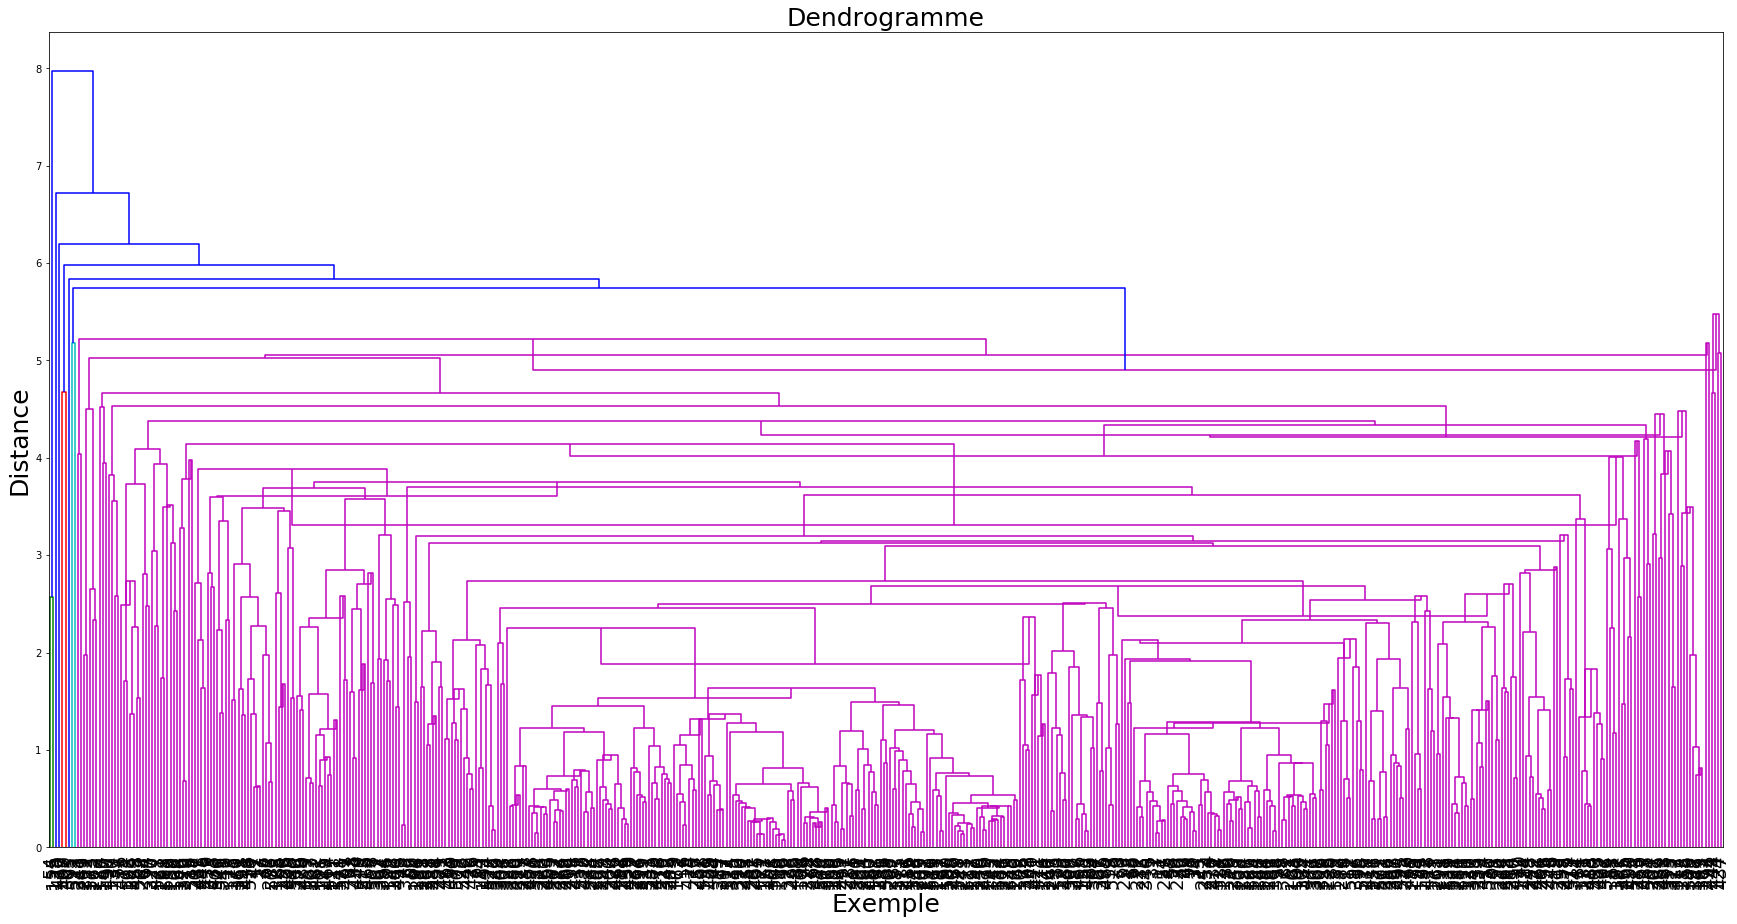

array([[7.60000000e+01, 9.90000000e+01, 7.16430660e-02, 2.00000000e+00],
       [1.19000000e+02, 5.42000000e+02, 1.31952728e-01, 2.00000000e+00],
       [3.05000000e+02, 5.43000000e+02, 1.30919129e-01, 2.00000000e+00],
       ...,
       [4.10000000e+02, 1.07900000e+03, 6.19328605e+00, 2.00000000e+00],
       [1.38000000e+02, 1.08000000e+03, 6.71925780e+00, 2.00000000e+00],
       [9.79000000e+02, 1.08100000e+03, 7.97566864e+00, 2.00000000e+00]])

In [84]:
mat = un.normalisation(filmes_pd_redux_2001.drop("year", axis=1))
un.clustering_hierarchique('manhattan', mat)